## Imports and reading in the csv

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_colwidth', None)



In [23]:
df_train = pd.read_csv('train_house_price.csv')
df_test = pd.read_csv('test.csv')
dependentVariable = df_train['SalePrice']

#df_train


It is fine that some data gets cut off, as this information is for the data 
scientists sake of briefly looking at the data to see trends, further analysis
is done below

In [24]:
df_train['LivingLotAreaRatio'] = df_train.GrLivArea / df_train.LotArea

# Conduct EDA and provide appropriate visualizations in the process.

In [25]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LivingLotAreaRatio
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.202367
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.131458
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.158756
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.179791
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0.154137


In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score, train_test_split
pd.set_option('display.max_colwidth', None)



In [27]:
df_train = pd.read_csv('train_house_price.csv')
df_test = pd.read_csv('test.csv')
dependentVariable = df_train['SalePrice']

#df_train

## Create at least one feature from the data set.


In [28]:
df_train['LivingLotAreaRatio'] = df_train.GrLivArea / df_train.LotArea

## Conduct EDA and provide appropriate visualizations in the process.

In [29]:
#df_train.head()

There are a lot of missing values in certain features - 
we must filter or clean the data so then we can begin modeling

In [30]:
print(df_train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

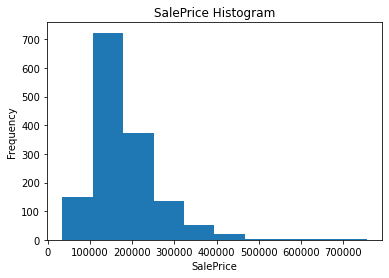

In [31]:
# testing normality - fairly normal 
plt.hist(dependentVariable)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice Histogram')
plt.show()

In [32]:
# Some possible features we can use to help train on
# Using spearman correlation to leverage the ranking system
correlations = df_train.corr(method='spearman')\
['SalePrice'].sort_values(ascending=True)
correlations_abs = correlations.abs()
# showing low correlated features with SalePrice so we know to remove them
print('\nLow correlations (absolute):\n', correlations_abs.head(35))


Low correlations (absolute):
 EnclosedPorch         0.218394
KitchenAbvGr          0.164826
OverallCond           0.129325
LowQualFinSF          0.067719
MiscVal               0.062727
BsmtFinSF2            0.038806
YrSold                0.029899
Id                    0.018546
BsmtHalfBath          0.012189
MSSubClass            0.007192
PoolArea              0.058453
3SsnPorch             0.065440
MoSold                0.069432
ScreenPorch           0.100070
BsmtUnfSF             0.185197
LivingLotAreaRatio    0.197813
BsmtFullBath          0.225125
BedroomAbvGr          0.234907
2ndFlrSF              0.293598
BsmtFinSF1            0.301871
HalfBath              0.343008
WoodDeckSF            0.353802
LotFrontage           0.409076
MasVnrArea            0.421309
LotArea               0.456461
OpenPorchSF           0.477561
Fireplaces            0.519247
TotRmsAbvGrd          0.532586
YearRemodAdd          0.571159
1stFlrSF              0.575408
GarageYrBlt           0.593788
TotalBsm

In [33]:
# in order to clean our data, we drop the uneccesary features that were 
# determined above (less than 0.3) 
# as well as duplicated features or unneccessary ones for training such as 'Id'
# Sadly the feature we created was deemed not as relevent as the others, 
#thus we removed it


train_data = df_train[['LotFrontage', 'OverallQual', 'YearBuilt', 
                       'YearRemodAdd',
        'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

test_data = df_test[['LotFrontage', 'OverallQual', 'YearBuilt', 
                     'YearRemodAdd', 
        'MasVnrArea','BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                     'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

## Data Cleaning & Pre-processing

In [34]:
# the amount of missing data
nullTotals = train_data.isnull().sum().sort_values(ascending = False) 
percentageOfNull = (train_data.isnull().sum() / df_train.isnull()
                    .count()).sort_values(ascending = False) 
emptyVals = pd.concat([nullTotals, percentageOfNull], axis=1, 
                      keys=['Total Missing Values', 'Percentage of Feature \
                      Specific Data that is Null'])
emptyVals.head(20)

,Total Missing Values,Percentage of Feature Specific Data that is Null
LotFrontage,259.0,0.177397
GarageYrBlt,81.0,0.055479
MasVnrArea,8.0,0.005479
FullBath,0.0,0.000000
OpenPorchSF,0.0,0.000000
WoodDeckSF,0.0,0.000000
GarageArea,0.0,0.000000
GarageCars,0.0,0.000000
Fireplaces,0.0,0.000000
TotRmsAbvGrd,0.0,0.000000


In [35]:
# deleting missing data that has more than 80% missing 
train_data = train_data.drop((emptyVals\
                        [emptyVals['Total Missing Values'] > 81]).index,1)

/var/folders/sz/wyddnfrs2pzfs3g11779b4g00000gn/T/ipykernel_38782/1382954168.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data = train_data.drop((emptyVals\


In [36]:
# test data
nullTotals = test_data.isnull().sum().sort_values(ascending = False) 
percentageOfNull = (test_data.isnull().sum() / df_train.isnull().count())\
.sort_values(ascending = False) 
emptyVals = pd.concat([nullTotals, percentageOfNull], \
axis=1, keys=['Total_Missing_Values', 'Percentage of Feature Specific Data \
              that is Null'])
emptyVals.head(20)

,Total_Missing_Values,Percentage of Feature Specific Data that is Null
LotFrontage,227.0,0.155479
GarageYrBlt,78.0,0.053425
MasVnrArea,15.0,0.010274
GarageArea,1.0,0.000685
BsmtFinSF1,1.0,0.000685
TotalBsmtSF,1.0,0.000685
GarageCars,1.0,0.000685
TotRmsAbvGrd,0.0,0.000000
WoodDeckSF,0.0,0.000000
Fireplaces,0.0,0.000000


In [37]:
# again dropping the features that contain A LOT of missing values 
test_data = test_data.drop((emptyVals[emptyVals['Total_Missing_Values'] > 78])
                           .index,1)

/var/folders/sz/wyddnfrs2pzfs3g11779b4g00000gn/T/ipykernel_38782/3088940396.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data = test_data.drop((emptyVals[emptyVals['Total_Missing_Values'] > 78])


In [38]:
# showing which features still need cleaning in both test and training data

print(train_data.isnull().sum().sort_values(ascending=False).head(20))
print('___________________\n')
print(test_data.isnull().sum().sort_values(ascending=False).head(20))

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64
___________________

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64


In [39]:
# replacing the possibly relevent features that have missing valus 
# with the mean of their respective columns
train_data['GarageYrBlt'] = train_data['GarageYrBlt']\
.fillna(train_data['GarageYrBlt'].mean())
train_data['MasVnrArea'] = train_data['MasVnrArea']\
.fillna(train_data['MasVnrArea'].mean())

In [40]:
test_data.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

In [41]:
# replacing areas in the test data that are missing with their means
test_data['MasVnrArea'] = test_data['MasVnrArea']\
.fillna(test_data['MasVnrArea'].mean())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF']\
.fillna(test_data['TotalBsmtSF'].mean())
test_data['GarageArea'] = test_data['GarageArea']\
.fillna(test_data['GarageArea'].mean())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1']\
.fillna(test_data['BsmtFinSF1'].mean())
test_data['GarageYrBlt'] = test_data['GarageYrBlt']\
.fillna(test_data['GarageYrBlt'].mean())
test_data['GarageCars'] = test_data['GarageCars']\
.fillna(test_data['GarageCars'].mean())


In [42]:
#for c in train_data.columns[:-5]:
    
#        plt.figure(figsize=(3,3))
#        plt.title("{} vs. \nSalePrice".format(c),fontsize=16)
#        print(c)
#        print(type(c))
#        print(df_train[c].dtype.type)
        #if df_train[c]. != 
#        plt.scatter(x=df_train[c],y=df_train['SalePrice'],color='blue',\
#                    edgecolor='k')
#        plt.grid(True)
#        plt.xlabel(c,fontsize=14)
#        plt.ylabel('SalePrice',fontsize=14)
#        plt.show()

Some of the features do not really offer a great idea or visualization between SalePrice and itself such as OpenPorchSf - we need to explore further to help understand the relevent features

## Finding the highest correlated features

In [43]:
# Creating the top 15 correlated features
cols = train_data.corr().nlargest(15, 'SalePrice')['SalePrice'].index
train_data_top_15 = train_data[cols]

In [44]:
# splitting the training data by the top 15 correlated features 
x_train, x_test, y_train, y_test = train_test_split(
    train_data_top_15.drop('SalePrice', axis=1), \
    train_data_top_15['SalePrice'], \
    test_size=0.3, random_state=101)

In [45]:
x_test.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1'],
      dtype='object')

In [46]:
# in order for the data points to be of the same unit, we must scale the data

scalerX = StandardScaler()
scalerY = StandardScaler()

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)


x_train = scalerX.fit_transform(x_train)
x_test = scalerX.fit_transform(x_test)
y_train = scalerX.fit_transform(y_train)
y_test = scalerY.fit_transform(y_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Experiment to see which value of hyperparameter to utilize 

In [47]:
n_folds = 15

# splitting the data on different folds to showcase overall trends
def rmse(model):
    kf = KFold(n_folds, shuffle = True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train.ravel(), scoring=
                                   "neg_mean_squared_error", cv = kf))
    return(rmse)

In [48]:
# testing model confidences 
model_ridge = Ridge()
model_lasso = Lasso()
model_elasticNet = ElasticNet(l1_ratio=0.5)

# possible alpha_series we can use  
alpha_series = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

# Evaluating models through k-fold cross-validation defined earlier
ridge_test = [rmse(Ridge(alpha = alpha)).mean() for alpha in alpha_series]
lasso_test = [rmse(Lasso(alpha = alpha)).mean() for alpha in alpha_series]
elasticNet_test = [rmse(ElasticNet(alpha = alpha)).mean() for alpha in \
                   alpha_series]

ridge_test = pd.Series(ridge_test, index = alpha_series)
lasso_test = pd.Series(lasso_test, index = alpha_series)
elasticNet_test = pd.Series(elasticNet_test, index = alpha_series)


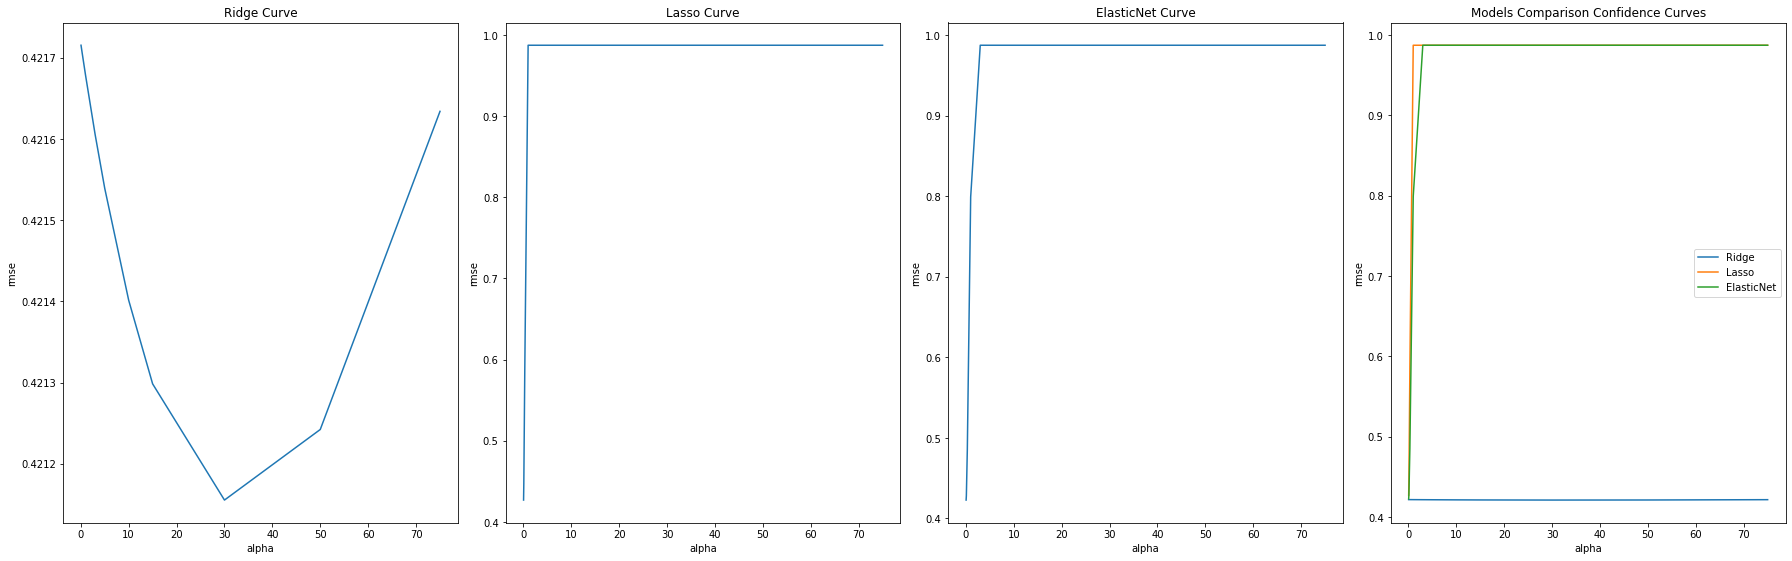

In [49]:
plt.figure(figsize=(25,15))

plt.subplot(241)
ridge_test.plot(title = "Ridge Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

lasso_test = pd.Series(lasso_test, index = alpha_series)
plt.subplot(242)
lasso_test.plot(title = "Lasso Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

elasticNet_test = pd.Series(elasticNet_test, index = alpha_series)
plt.subplot(243)
elasticNet_test.plot(title = "ElasticNet Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

plt.subplot(244)
ridge_test.plot()
lasso_test.plot()
elasticNet_test.plot()
plt.legend(labels=['Ridge','Lasso','ElasticNet'])
plt.title('Models Comparison Confidence Curves')
plt.xlabel("alpha")
plt.ylabel("rmse")

plt.tight_layout()

Experiment to see which values are of rmse change based on different 
validation curves based on different alphas
Some findings: lasso and elasticNet are especcially affected by a slight 
change in alpha and will cause horrible errors at alpha being higher than 5 or so 
Ridge plays an opposite effect, where there an alpha of ~30 offers the lowest form of error
Good thing we need to only tune ElasticNet to have a lower alpha to accomodate our results

In [50]:
# Modifying our test data to not have irrelevent features so that it matches
# the size of the data set used in our modeling schemes
test_data_dropped = test_data.copy()
test_data_dropped

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.000000,1.0,730.0,140,0
1,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.000000,1.0,312.0,393,36
2,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.000000,2.0,482.0,212,34
3,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.000000,2.0,470.0,360,36
4,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.000000,2.0,506.0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,0.0,546.0,546,546,1092,1,5,0,1977.721217,0.0,0.0,0,0
1455,4,1970,1970,0.0,252.0,546.0,546,546,1092,1,6,0,1970.000000,1.0,286.0,0,24
1456,5,1960,1996,0.0,1224.0,1224.0,1224,0,1224,1,7,1,1960.000000,2.0,576.0,474,0
1457,5,1992,1992,0.0,337.0,912.0,970,0,970,1,6,0,1977.721217,0.0,0.0,80,32


OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1'
       
These are the columns used in the linear regression model, so dropping the unused columns in the test set

In [51]:
test_data_dropped.drop(['2ndFlrSF', 'WoodDeckSF', 
                'OpenPorchSF'], axis=1, inplace=True)



## Ridge Modeling

In [52]:
model_ridge.fit(x_train, y_train)

Ridge()

In [53]:
# creating predictions
predictions_ridge = model_ridge.predict(x_test)
predictions_ridge = predictions_ridge.reshape(-1,1)

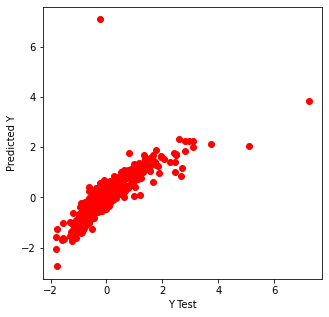

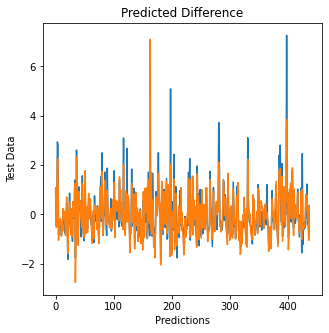

In [54]:
# plotting our linear model based on the predictions 
plt.figure(figsize=(5, 5))
plt.scatter(y_test,predictions_ridge, color = 'red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# some of the outlying data can be seen that it does not fully predict it as 
# we hoped
plt.figure(figsize=(5, 5))
plt.plot(y_test,label = 'Test Data')
plt.xlabel('Predictions')
plt.ylabel('Test Data')
plt.title('Predicted Difference')
plt.plot(predictions_ridge, label = 'Predictions')
plt.show()

The data is fairly linear, where it rises

In [55]:
scores = cross_val_score(model_ridge, x_train, y_train.ravel(),
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0.3791443  0.50579105 0.31474968 0.62420845 0.35794268 0.48340483
 0.49534554 0.35121378 0.32827551 0.38028069]
Mean: 0.42203565085475575
Standard deviation: 0.09488801731649145


Per the cross validation scores, there is some error seen but we need to see 
the scores of the other models to understand how it fares with Lasso and ElasticNet

In [56]:
# scaling the test data to match the scaled transformation done in the model
test_data_dropped = scalerX.fit_transform(test_data_dropped)
test_data_dropped

array([[-0.75110125, -0.34094461, -1.07288463, ..., -0.65048832,
        -0.98801273,  1.18594459],
       [-0.05487716, -0.43969491, -1.21490841, ..., -0.76719424,
        -0.98801273, -0.7412126 ],
       [-0.75110125,  0.844059  ,  0.6787419 , ...,  0.74998273,
         0.30162251,  0.04255946],
       ...,
       [-0.75110125, -0.37386137,  0.58405938, ..., -0.6893903 ,
         0.30162251,  0.47593931],
       [-0.75110125,  0.67947517,  0.39469435, ...,  0.        ,
        -2.27764797, -2.17966486],
       [ 0.64134693,  0.71239193,  0.48937687, ...,  0.59437483,
         1.59125775,  0.81711068]])

In [57]:
test_prediction_ridge = model_ridge.predict(test_data_dropped)
test_prediction_ridge = test_prediction_ridge.reshape(-1,1)
test_prediction_ridge = scalerY.inverse_transform(test_prediction_ridge)
test_prediction_ridge=\
pd.DataFrame(test_prediction_ridge,columns=['SalePrice'])
test_prediction_ridge.head()

,SalePrice
0,136392.990883
1,146093.911077
2,200496.676163
3,218483.318216
4,218318.940594


In [58]:
test_id = df_test['Id']
ids = pd.DataFrame(test_id, columns=['Id'])
result = pd.concat([ids,test_prediction_ridge], axis=1)
result.head()

,Id,SalePrice
0,1461,136392.990883
1,1462,146093.911077
2,1463,200496.676163
3,1464,218483.318216
4,1465,218318.940594


In [59]:
result.to_csv('submission_ridge.csv', index=False)

## Lasso Modeling

In [60]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)


scores = cross_val_score(lasso_reg, x_train, y_train.ravel(),
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0.38019943 0.56235141 0.32193657 0.61525736 0.40194207 0.54004489
 0.54978363 0.36977251 0.34460402 0.39271501]
Mean: 0.44786068992095424
Standard deviation: 0.10117321092656892


In [61]:
# creating predictions
predictions_lasso = lasso_reg.predict(x_test)
predictions_lasso = predictions_lasso.reshape(-1,1)

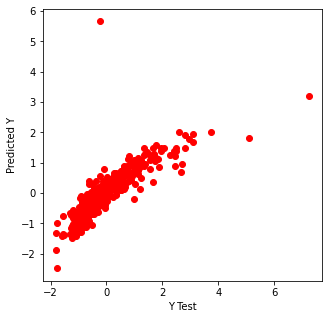

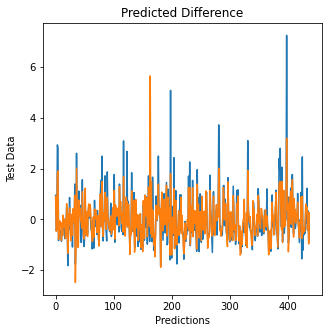

In [62]:
# plotting our linear model based on the predictions 
plt.figure(figsize=(5, 5))
plt.scatter(y_test,predictions_lasso, color = 'red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# some of the outlying data can be seen that it does not fully predict it as 
# we hoped
plt.figure(figsize=(5, 5))
plt.plot(y_test,label = 'Test Data')
plt.xlabel('Predictions')
plt.title('Predicted Difference')
plt.ylabel('Test Data')
plt.plot(predictions_lasso, label = 'Predictions')
plt.show()

Scores offer a different idea, where there seems to be higher in the lasso model
which means there should be more error. I did tune it to be 0.1 alpha because without 
tuning it caused the model to be extremely skewed. We need to see how the hidden test case 
fares on the model to understand the big picture. 

In [63]:
test_prediction_lasso = lasso_reg.predict(test_data_dropped)
test_prediction_lasso = test_prediction_lasso.reshape(-1,1)
test_prediction_lasso = scalerY.inverse_transform(test_prediction_lasso)
test_prediction_lasso = pd.DataFrame(test_prediction_lasso, columns=\
                                     ['SalePrice'])
test_prediction_lasso.head()

,SalePrice
0,147124.525071
1,164894.381267
2,188584.319532
3,205214.658895
4,225799.280513


In [64]:
result_lasso = pd.concat([ids,test_prediction_lasso], axis=1)
result_lasso.head()

,Id,SalePrice
0,1461,147124.525071
1,1462,164894.381267
2,1463,188584.319532
3,1464,205214.658895
4,1465,225799.280513


In [65]:
result_lasso.to_csv('submission_lasso.csv', index=False)

Briefly looking at the data, it seems like the lasso prediction offers a higher SalePrice
than the Ridge model for the first 5 instances, this could be what the Ridge was lacking in

## ElasticNet Modeling

In [66]:
# Hyperparameter tuning example got from the textbook, alpha = 0.1 was chosen 
# because it seems like the higher the alpha the higher likeliness of error
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)


scores = cross_val_score(elastic_net, x_train, y_train.ravel(),
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0.37389078 0.53411196 0.30138091 0.60520488 0.37757685 0.50736835
 0.52463817 0.35168608 0.33011717 0.37828836]
Mean: 0.4284263503167998
Standard deviation: 0.09883146109894546


In [67]:
# creating predictions
predictions_elastic = elastic_net.predict(x_test)
predictions_elastic = predictions_elastic.reshape(-1,1)

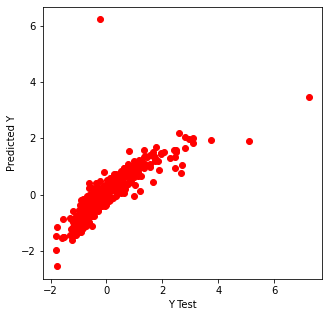

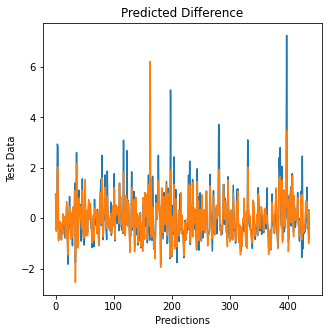

In [68]:
# plotting our linear model based on the predictions 
plt.figure(figsize=(5, 5))
plt.scatter(y_test,predictions_elastic, color = 'red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# some of the outlying data can be seen that it does not fully predict it as 
# we hoped
plt.figure(figsize=(5, 5))
plt.plot(y_test, label = 'Test Data')
plt.xlabel('Predictions')
plt.title('Predicted Difference')
plt.ylabel('Test Data')
plt.plot(predictions_elastic, label = 'Predictions')
plt.show()

In [69]:
test_prediction_elastic = elastic_net.predict(test_data_dropped)
test_prediction_elastic = test_prediction_elastic.reshape(-1,1)
test_prediction_elastic = scalerY.inverse_transform(test_prediction_elastic)
test_prediction_elastic = \
pd.DataFrame(test_prediction_elastic, columns=['SalePrice'])
test_prediction_elastic.head()

,SalePrice
0,141058.870136
1,157043.830919
2,192430.673910
3,208990.229221
4,219167.692644


In [70]:
result_elastic = pd.concat([ids,test_prediction_elastic], axis=1)
result_elastic.head()

,Id,SalePrice
0,1461,141058.870136
1,1462,157043.830919
2,1463,192430.673910
3,1464,208990.229221
4,1465,219167.692644


Per the top 5 results, it is not as high as Lasso predictions but is more than Ridge predictions. I believe ElasticNet would fare the best due to the hyperparemeter tuning and the confidence in this modeling scheme. 

In [71]:
result_elastic.to_csv('submission_elastic.csv', index=False)